<a href="https://colab.research.google.com/github/beriaacan/Radon/blob/main/2_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import pandas as pd
from googleapiclient.discovery import build
from google.oauth2 import service_account
import time
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns #korelasyon matrisi icin
import matplotlib.pyplot as plt
import os

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
FOLDERNAME ='bitirme/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [4]:
# CSV dosyalarının bulunduğu klasörün yolu
csv_folder_path = '/content/drive/My Drive/bitirme/radon_analysis_final/full_data_csv'

all_sheet_names = []

# Klasördeki tüm CSV dosyalarını tek tek oku ve görüntüle
for sheet_names in os.listdir(csv_folder_path):
    if sheet_names.endswith('.csv'):
        # Her bir sheet adını listeye ekle
        all_sheet_names.append(sheet_names)

# Sonuçları görüntüle
print("All Sheet Names:", all_sheet_names)

All Sheet Names: ['data_+905367791473_tel.csv', 'data_+905396792291_tel.csv', 'data_+905396792336_tel.csv', 'data_+905396792349_tel.csv', 'data_+905396792354_tel.csv', 'data_+905396792374_tel.csv', 'data_+905396792381_tel.csv', 'data_+905396792392_tel.csv', 'data_+905396792421_tel.csv', 'data_+905396792427_tel.csv', 'data_+905396792434_tel.csv', 'data_+905396792435_tel.csv', 'data_+905396792437_tel.csv', 'data_+905396792448_tel.csv', 'data_+905396792487_tel.csv', 'data_+905396792489_tel.csv', 'data_+905396792490_tel.csv', 'data_+905396792491_tel.csv', 'data_+905396792843_tel.csv', 'data_+905396792846_tel.csv', 'data_+905396792925_tel.csv', 'data_+905396793149_tel.csv', 'data_+905396793157_tel.csv', 'data_+905396793168_tel.csv', 'data_+905396793181_tel.csv', 'data_+905396793193_tel.csv', 'data_+905396793194_tel.csv', 'data_+905396793196_tel.csv', 'data_+905396793221_tel.csv', 'data_+905396793223_tel.csv', 'data_+905396793234_tel.csv', 'data_+905396793243_tel.csv', 'data_+905396793256_te

Bursa'nın Mudanya Belediye binası, merkez üssü Marmara Denizi Gemlik Körfezi olan 5,1 büyüklüğündeki depremi sonrası merkez üssüne yakın bulunan 8 dedektör üzerinde inceleme yapıyorum.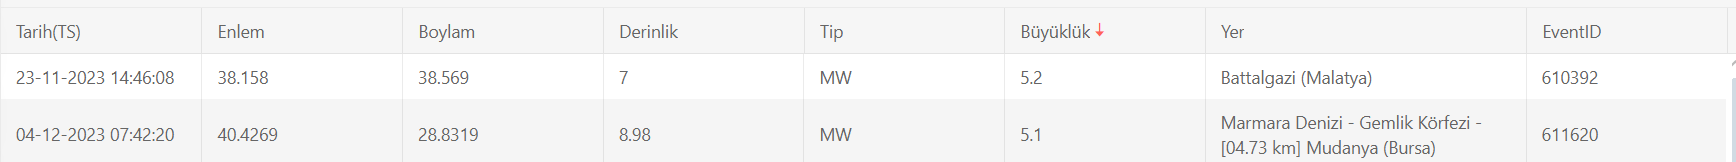

En yakın dedektör ID:

**çınarcık:**

15  data_+905396792434_tel

**gemlik :**

özdilek 3   data_+905396792349_tel ,   

gemsas 25  data_+905396792491_tel


**karacabey :**

1   data_+905396792291_tel



**bandırma:**

24  data_+905396792490_tel

**erdek:**

46  data_+905396793251_tel ,

48  data_+905396793257_tel  aynı yerde iki adet var

**bursa**

37  data_+905396793193_tel  


In [5]:
chosen_sheet_d1 = "data_+905396792434_tel.csv"
chosen_sheet_d2="data_+905396792349_tel.csv"
chosen_sheet_d3="data_+905396792491_tel.csv"
chosen_sheet_d4="data_+905396792291_tel.csv"
chosen_sheet_d5="data_+905396792490_tel.csv"
chosen_sheet_d6="data_+905396793251_tel.csv" #az data
chosen_sheet_d7="data_+905396793257_tel.csv"
chosen_sheet_d8="data_+905396793193_tel.csv"

for sheet_names in os.listdir(csv_folder_path):
    if sheet_names.endswith('.csv') and sheet_names == chosen_sheet_d1:
        file_path = os.path.join(csv_folder_path, sheet_names)
        df = pd.read_csv(file_path)
        # Türkçe formatındaki sayıları uygun formata dönüştür
        numeric_columns = df.columns[1:]
        df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)
        # Seçilen sheet adını yazdır
        print(f"Selected sheet: {sheet_names}")



df.head()

Selected sheet: data_+905396792434_tel.csv


,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
0,22.8.23-12:30:29,1.001,220.001,6.101,144.001,3.151,508.001,0.001,511.001,1.951,1.001,1.001,39.991,1.521,35.061,2.491,1014.201,0.091,-7.859,0.841
1,22.8.23-13:31:40,2.001,209.001,1.701,134.001,2.561,508.001,0.001,505.001,1.601,3.001,3.001,42.831,0.621,29.791,1.441,1013.791,0.061,-4.469,0.521
2,22.8.23-14:32:51,3.001,205.001,1.501,129.001,2.191,508.001,0.001,503.001,0.891,2.001,2.001,44.921,0.731,26.231,1.501,1013.451,0.161,-1.669,1.341
3,22.8.23-15:34:2,4.001,199.001,1.341,120.001,2.111,508.001,0.001,503.001,0.581,0.001,0.001,46.731,0.391,21.321,1.141,1013.101,0.061,1.251,0.531
4,22.8.23-16:35:14,5.001,194.001,2.111,113.001,3.821,508.001,0.001,503.001,0.581,1.001,1.001,47.381,0.171,18.311,1.491,1012.881,0.071,3.021,0.611


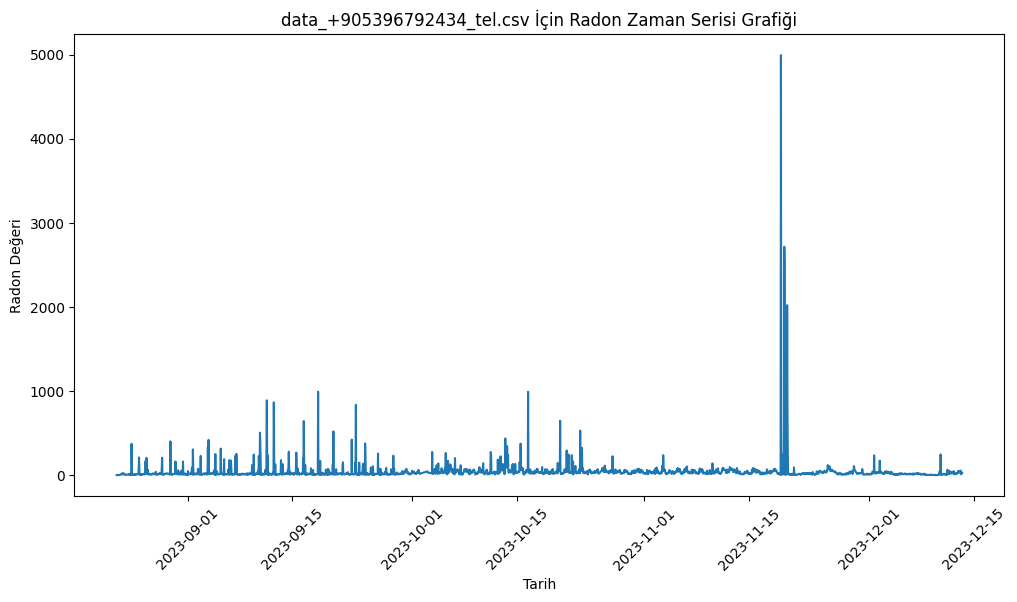

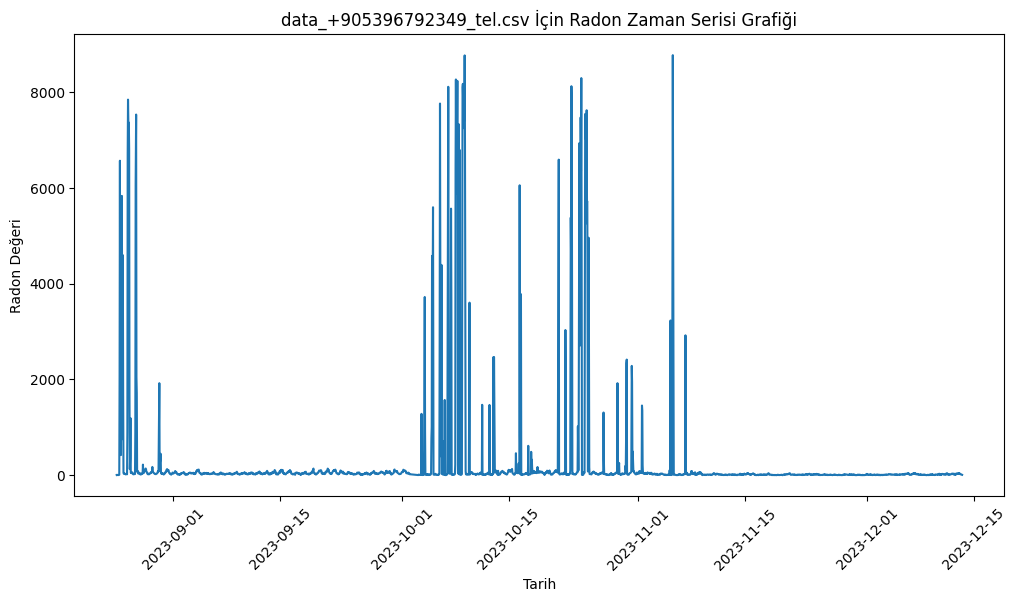

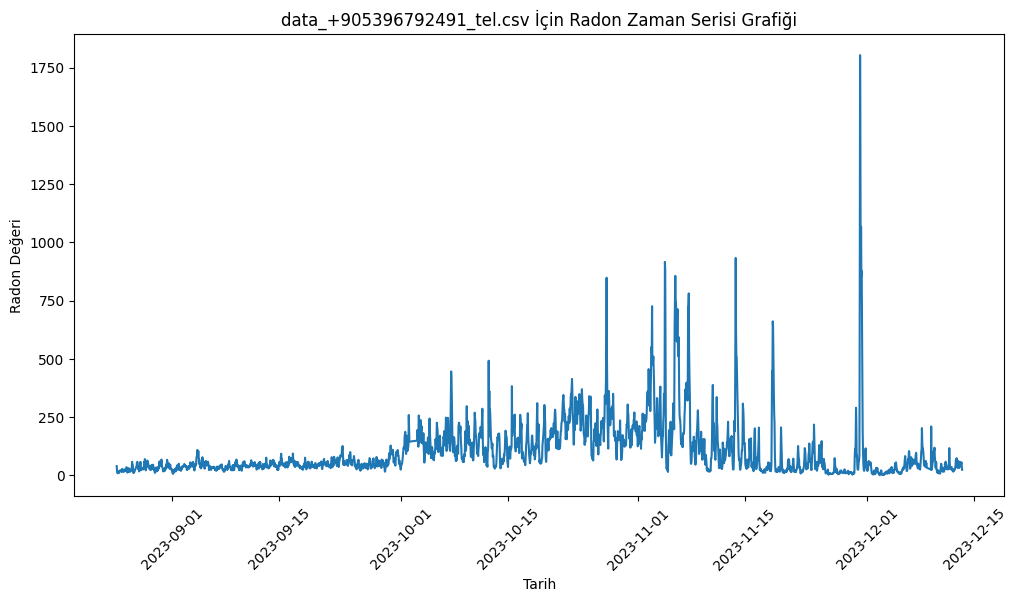

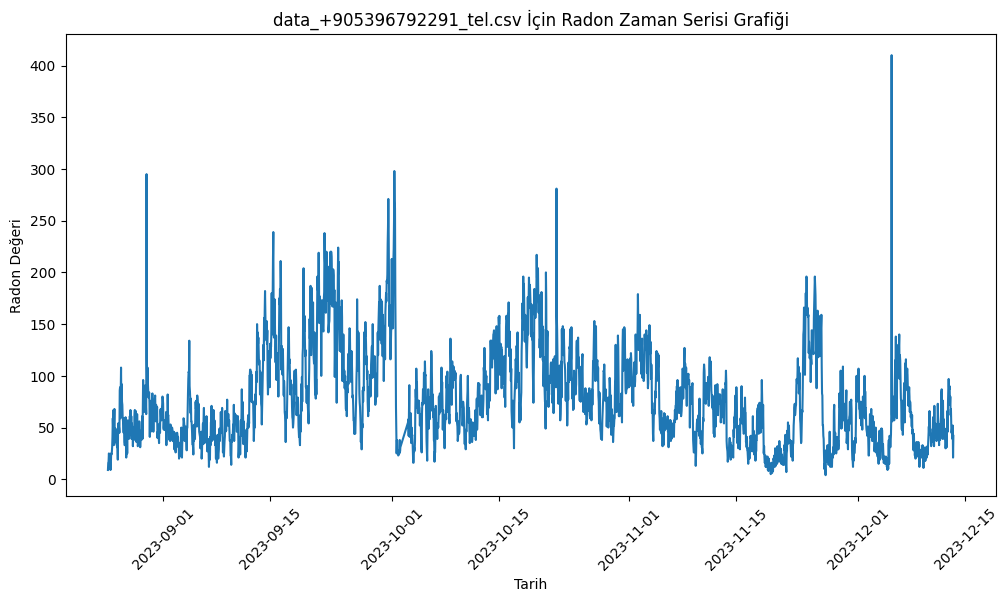

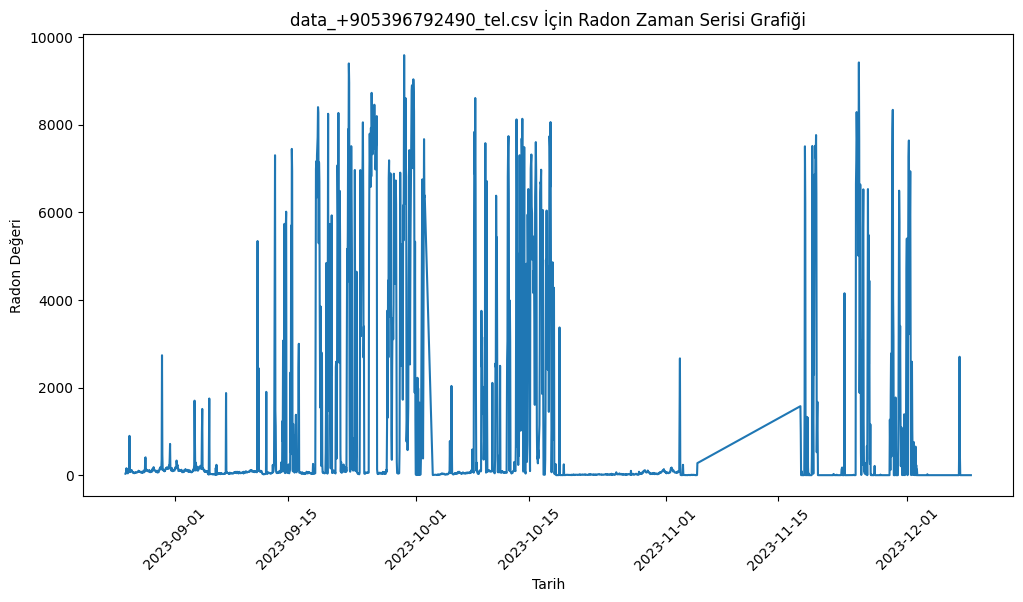

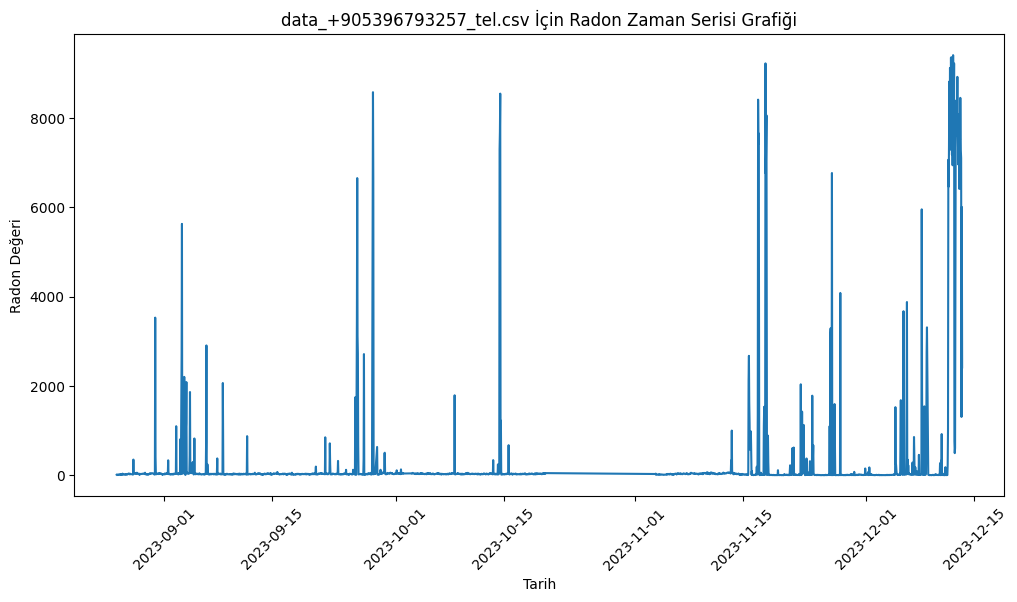

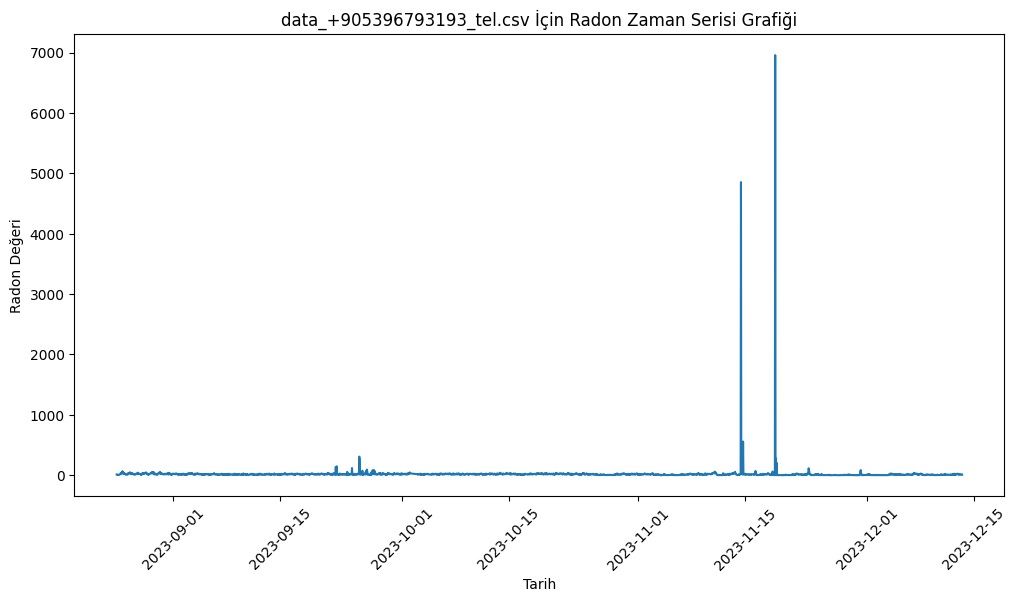

In [6]:
def plot_time_series(chosen_sheet):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'radon_real']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='radon_real')
        plt.title(f"{chosen_sheet} İçin Radon Zaman Serisi Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('Radon Değeri')
        plt.xticks(rotation=45)
        plt.show()

# Chosen sheets list
chosen_sheets = [
    "data_+905396792434_tel.csv",
    "data_+905396792349_tel.csv",
    "data_+905396792491_tel.csv",
    "data_+905396792291_tel.csv",
    "data_+905396792490_tel.csv",
    #"data_+905396793251_tel.csv",
    "data_+905396793257_tel.csv",
    "data_+905396793193_tel.csv"
]

# Plot time series for each chosen sheet
for sheet in chosen_sheets:
    plot_time_series(sheet)


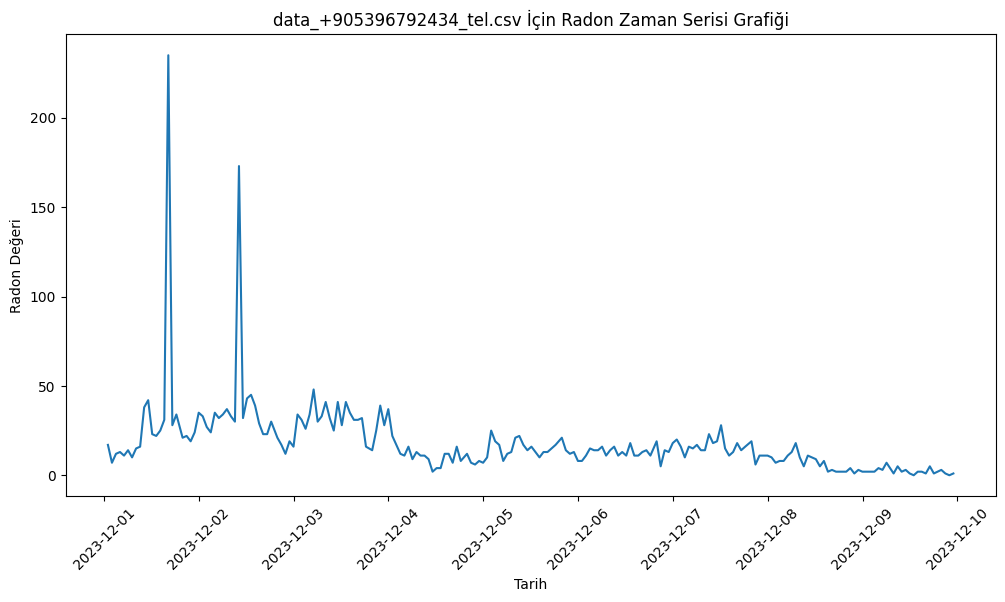

In [7]:
def plot_and_save_time_series(chosen_sheet, output_folder, start_date, end_date):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Filter data within the specified date range
        df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]

        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'radon_real']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='radon_real')
        plt.title(f"{chosen_sheet} İçin Radon Zaman Serisi Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('Radon Değeri')
        plt.xticks(rotation=45)
        plt.show()

        # Save the plot as a PNG file
        output_file_path = os.path.join(output_folder, f"{chosen_sheet}_time_series_plot.png")
        plt.savefig(output_file_path)
        plt.close()  # Close the plot to release resources


# Output folder for saving PNG files
output_folder = '/content/drive/My Drive/bitirme/radon_analysis_final'

# Date filter for data (10.12.2023 in this example)
start_date = pd.to_datetime("2023-12-1")
end_date = pd.to_datetime("2023-12-10")

# Plot and save time series for the chosen sheet within the specified date range
plot_and_save_time_series(chosen_sheet_d1, output_folder, start_date, end_date)




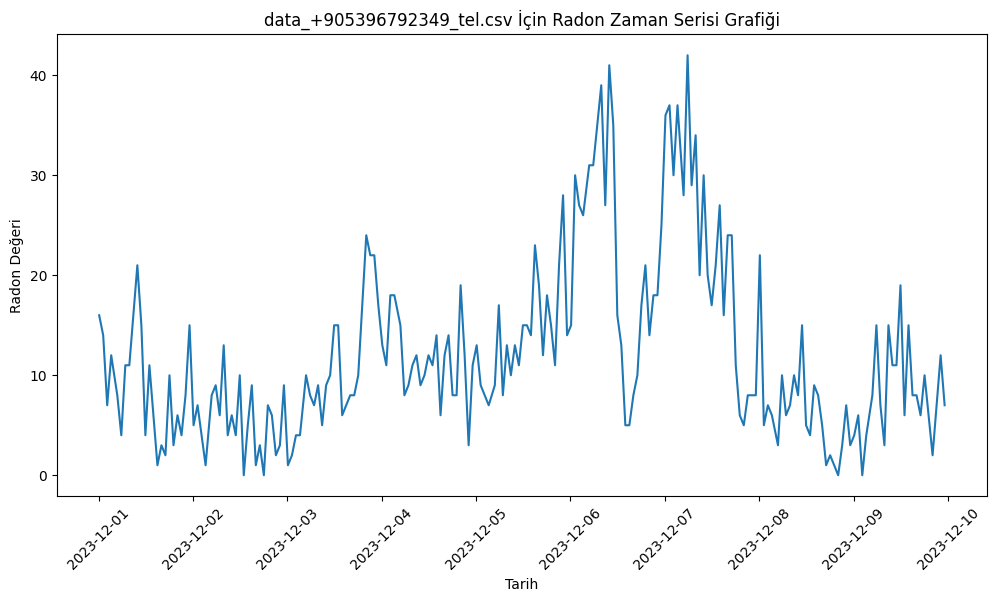

In [8]:
plot_and_save_time_series(chosen_sheet_d2, output_folder, start_date, end_date)

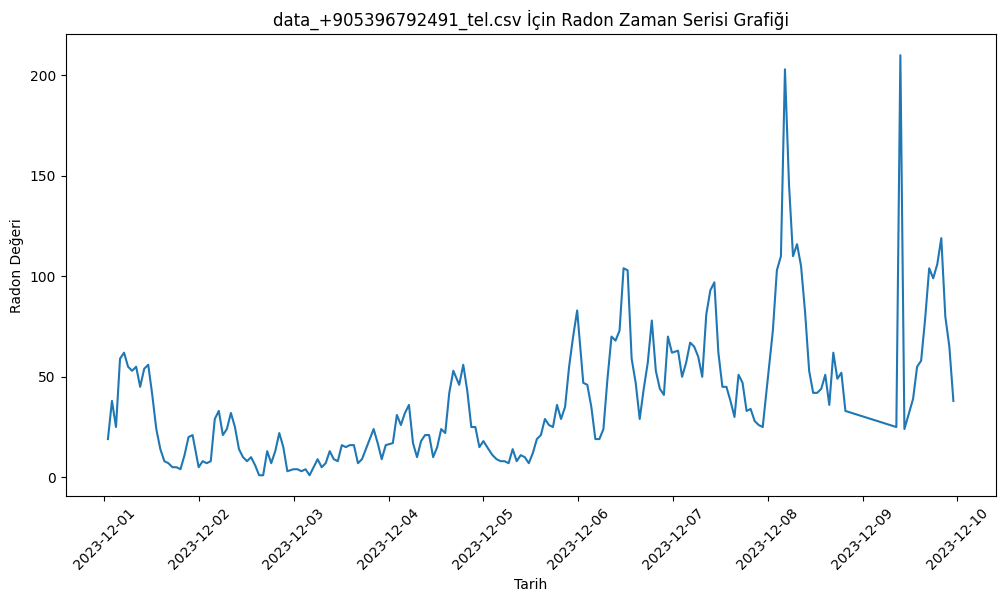

In [9]:
plot_and_save_time_series(chosen_sheet_d3, output_folder, start_date, end_date)

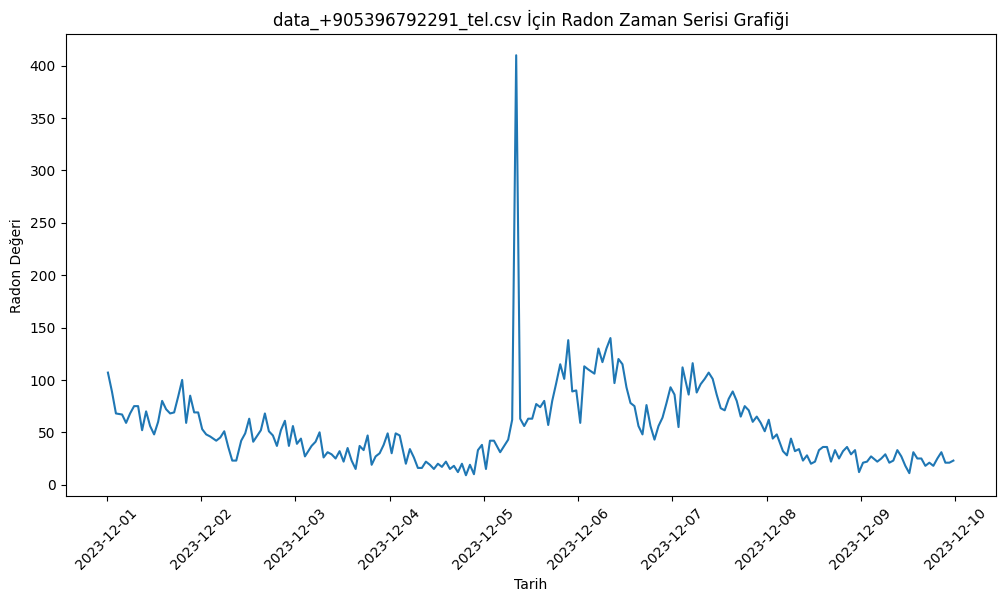

In [10]:
plot_and_save_time_series(chosen_sheet_d4, output_folder, start_date, end_date)

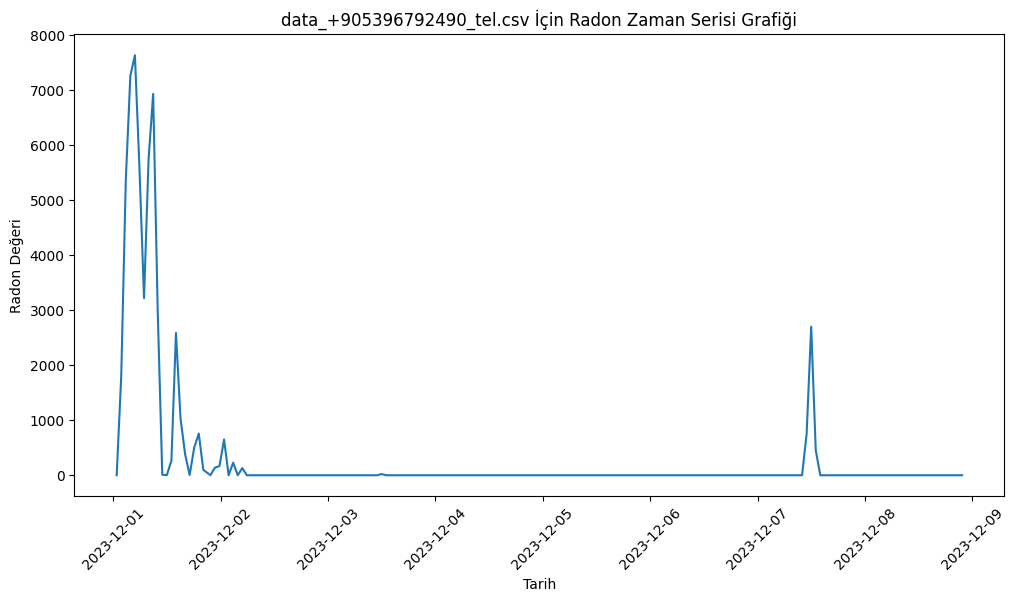

In [11]:
plot_and_save_time_series(chosen_sheet_d5, output_folder, start_date, end_date)

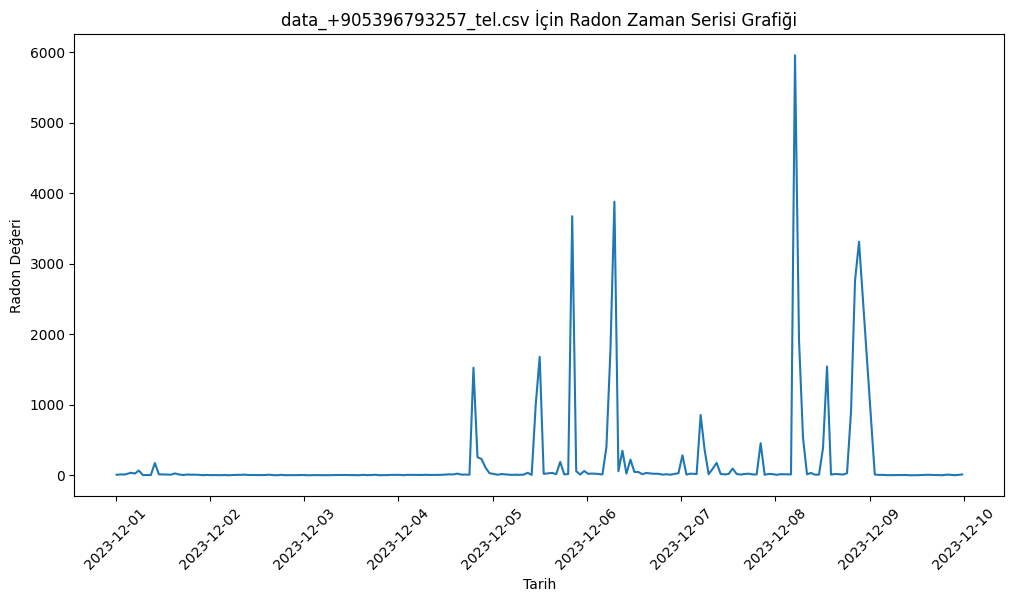

In [12]:
plot_and_save_time_series(chosen_sheet_d7, output_folder, start_date, end_date)

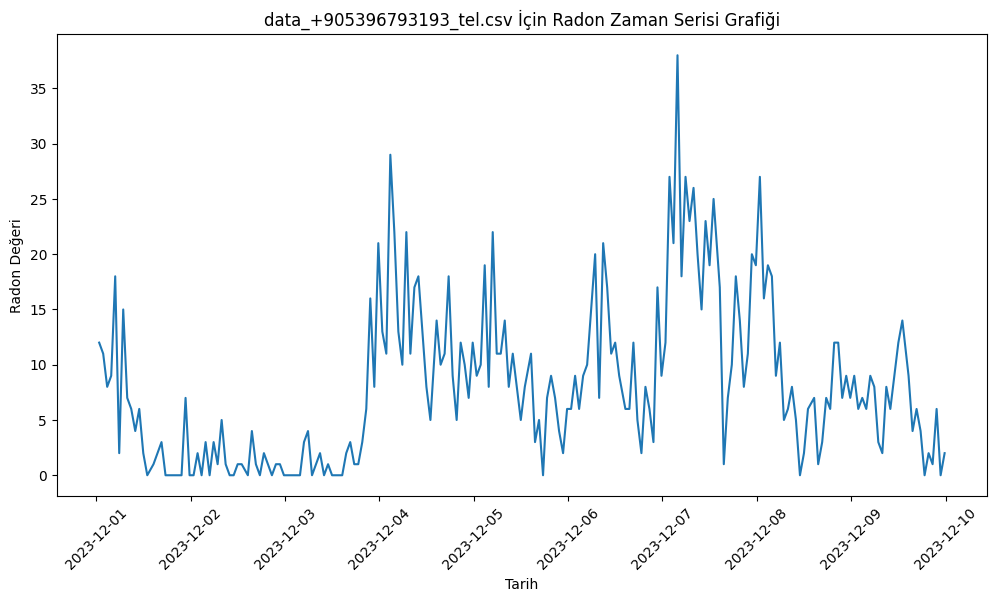

In [13]:
plot_and_save_time_series(chosen_sheet_d8, output_folder, start_date, end_date)

en iyi veri chosen_sheet_d4="data_+905396792291_tel.csv" için var. Bu veriyi daha detaylıca inceleyeceğim. Diğer parametrelerin etkisine bakacağım.

In [14]:
chosen_sheet_d4="data_+905396792291_tel.csv"


for sheet_names in os.listdir(csv_folder_path):
    if sheet_names.endswith('.csv') and sheet_names == chosen_sheet_d4:
        file_path = os.path.join(csv_folder_path, sheet_names)
        df = pd.read_csv(file_path)
        # Türkçe formatındaki sayıları uygun formata dönüştür
        numeric_columns = df.columns[1:]
        df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)
        # Seçilen sheet adını yazdır
        print(f"Selected sheet: {sheet_names}")



df.head()

Selected sheet: data_+905396792291_tel.csv


,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
0,24.8.23-18:7:10,1.001,454.001,53.341,260.001,40.411,513.001,0.001,192.001,20.521,9.001,9.001,32.591,0.471,41.981,0.671,1009.571,0.071,30.661,0.551
1,24.8.23-19:8:22,2.001,317.001,20.721,162.001,14.991,513.001,0.001,208.001,9.581,16.001,16.001,32.991,0.171,43.081,0.801,1009.561,0.041,30.801,0.371
2,24.8.23-20:9:34,3.001,286.001,3.861,139.001,3.541,513.001,0.001,214.001,8.791,17.001,17.001,32.111,0.301,46.191,1.011,1009.711,0.071,29.531,0.561
3,24.8.23-21:10:45,4.001,275.001,2.621,130.001,2.311,513.001,0.451,214.001,11.831,25.001,25.001,31.111,0.231,49.161,0.821,1009.991,0.091,27.201,0.731
4,24.8.23-22:11:57,5.001,269.001,1.001,126.001,0.941,512.001,0.431,220.001,10.071,22.001,22.001,30.491,0.151,51.931,0.811,1010.481,0.081,23.111,0.701


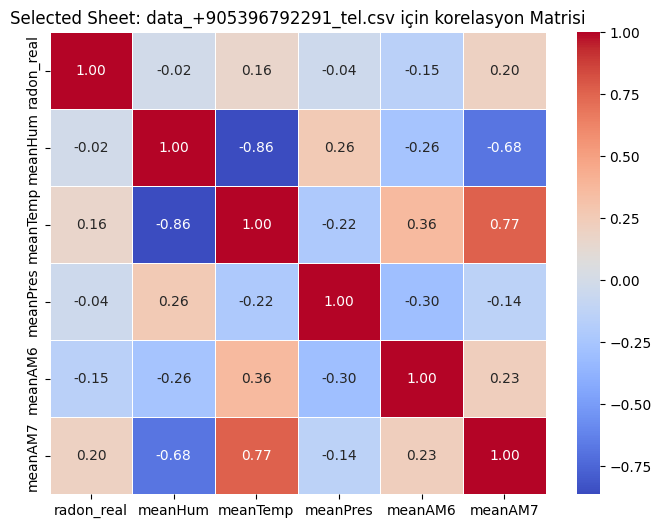

In [19]:
# İlgili sütunları seç
selected_columns = ['radon_real', 'meanHum', 'meanTemp', 'meanPres','meanAM6','meanAM7']
selected_df = df[selected_columns]

# Korelasyon matrisini oluştur
correlation_matrix = selected_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f"Selected Sheet: {chosen_sheet_d4} için korelasyon Matrisi")
plt.show()

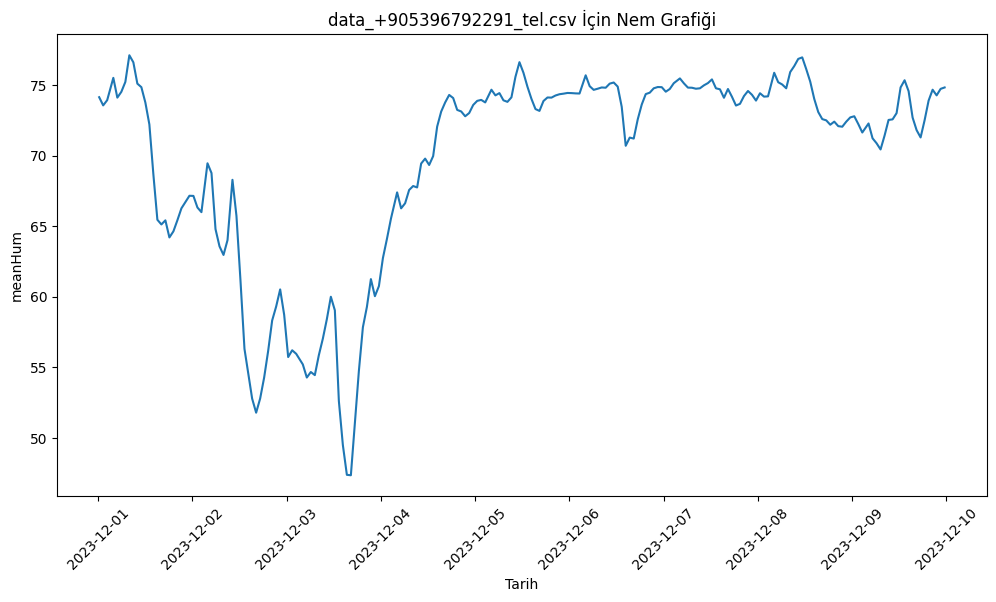

In [21]:
def plot_time_series(chosen_sheet, start_date, end_date):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Filter data within the specified date range
        df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]
        #['radon_real', 'meanHum', 'meanTemp', 'meanPres']
        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'meanHum']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='meanHum')
        plt.title(f"{chosen_sheet} İçin Nem Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('meanHum')
        plt.xticks(rotation=45)
        plt.show()

# Date filter for data (10.12.2023 in this example)
start_date = pd.to_datetime("2023-12-1")
end_date = pd.to_datetime("2023-12-10")

# Plot time series for the chosen sheet within the specified date range
plot_time_series(chosen_sheet_d4, start_date, end_date)


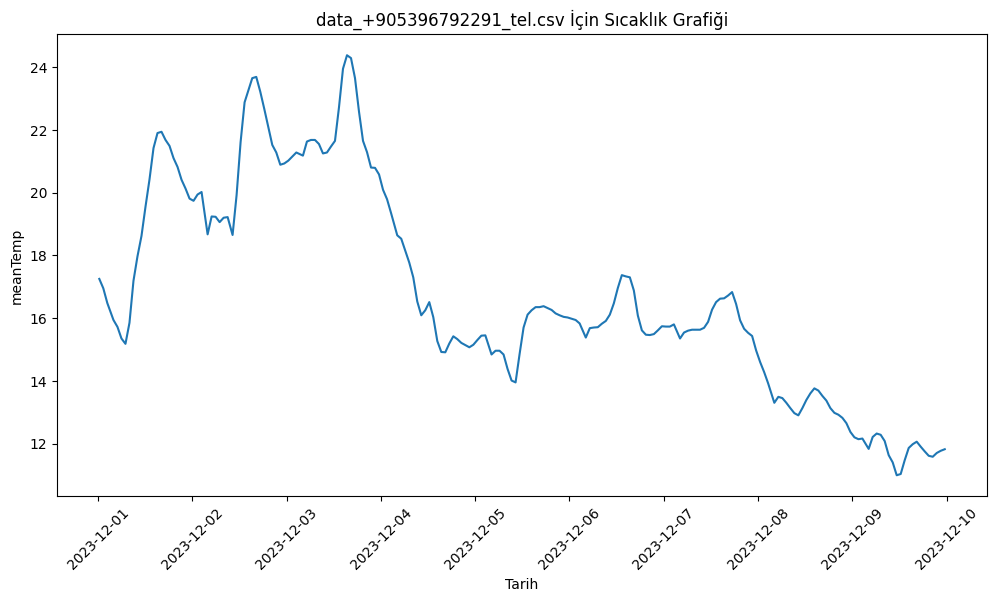

In [22]:
def plot_time_series(chosen_sheet, start_date, end_date):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Filter data within the specified date range
        df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]
        #['radon_real', 'meanHum', 'meanTemp', 'meanPres']
        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'meanTemp']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='meanTemp')
        plt.title(f"{chosen_sheet} İçin Sıcaklık Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('meanTemp')
        plt.xticks(rotation=45)
        plt.show()

# Date filter for data (10.12.2023 in this example)
start_date = pd.to_datetime("2023-12-1")
end_date = pd.to_datetime("2023-12-10")

# Plot time series for the chosen sheet within the specified date range
plot_time_series(chosen_sheet_d4, start_date, end_date)


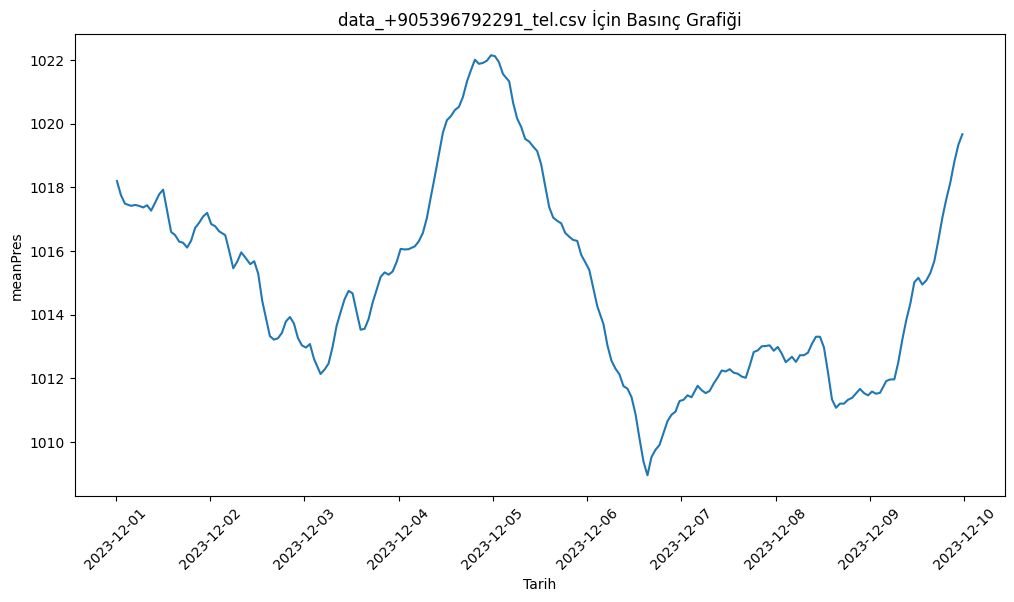

In [23]:
def plot_time_series(chosen_sheet, start_date, end_date):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Filter data within the specified date range
        df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]
        #['radon_real', 'meanHum', 'meanTemp', 'meanPres']
        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'meanPres']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='meanPres')
        plt.title(f"{chosen_sheet} İçin Basınç Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('meanPres')
        plt.xticks(rotation=45)
        plt.show()

# Date filter for data (10.12.2023 in this example)
start_date = pd.to_datetime("2023-12-1")
end_date = pd.to_datetime("2023-12-10")

# Plot time series for the chosen sheet within the specified date range
plot_time_series(chosen_sheet_d4, start_date, end_date)


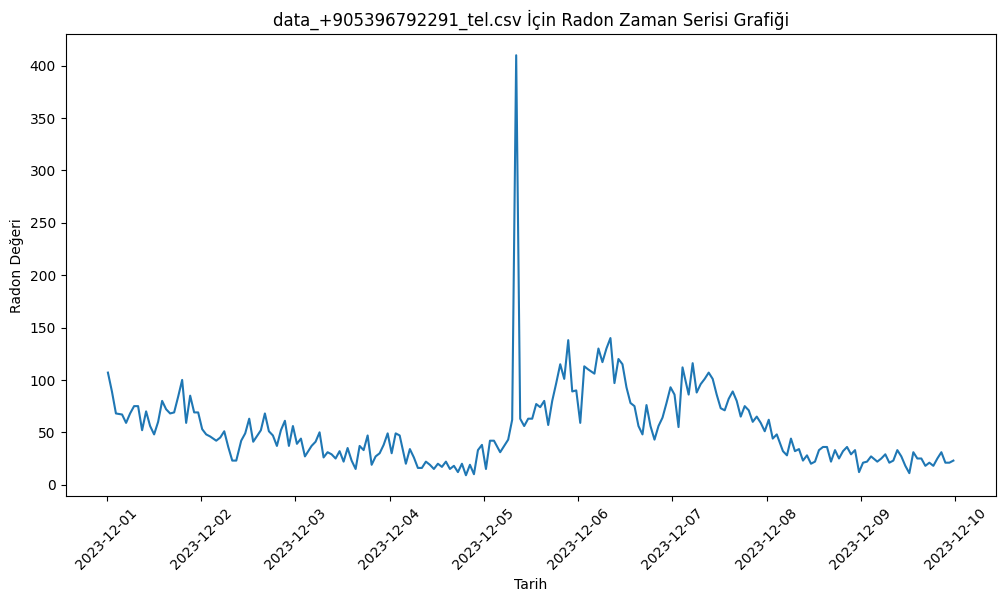

In [25]:
def plot_time_series(chosen_sheet, start_date, end_date):
    # Sayfayı oku
    file_path = os.path.join(csv_folder_path, chosen_sheet)
    df = pd.read_csv(file_path)

    # Türkçe formatındaki sayıları uygun formata dönüştür
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

    # Kontrol et: 'tarih' sütunu var mı?
    if 'tarih' not in df.columns:
        print(f"{chosen_sheet} adlı sayfa için 'tarih' sütunu bulunamadı.")
    else:
        # Tarih sütununu datetime formatına çevir
        df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

        # Filter data within the specified date range
        df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]

        # Seçilen sütunları belirle
        time_series_columns = ['tarih', 'radon_real']

        # Veriyi seçilen sütunlara göre filtrele
        time_series_data = df[time_series_columns]

        # Tarih sütununu indeks olarak ayarla
        time_series_data.set_index('tarih', inplace=True)

        # Zaman serisi grafiğini çiz
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_series_data, x=time_series_data.index, y='radon_real')
        plt.title(f"{chosen_sheet} İçin Radon Zaman Serisi Grafiği")
        plt.xlabel('Tarih')
        plt.ylabel('Radon Değeri')
        plt.xticks(rotation=45)
        plt.show()

# Date filter for data (10.12.2023 in this example)
start_date = pd.to_datetime("2023-12-1")
end_date = pd.to_datetime("2023-12-10")

# Plot time series for the chosen sheet within the specified date range
plot_time_series(chosen_sheet_d4, start_date, end_date)


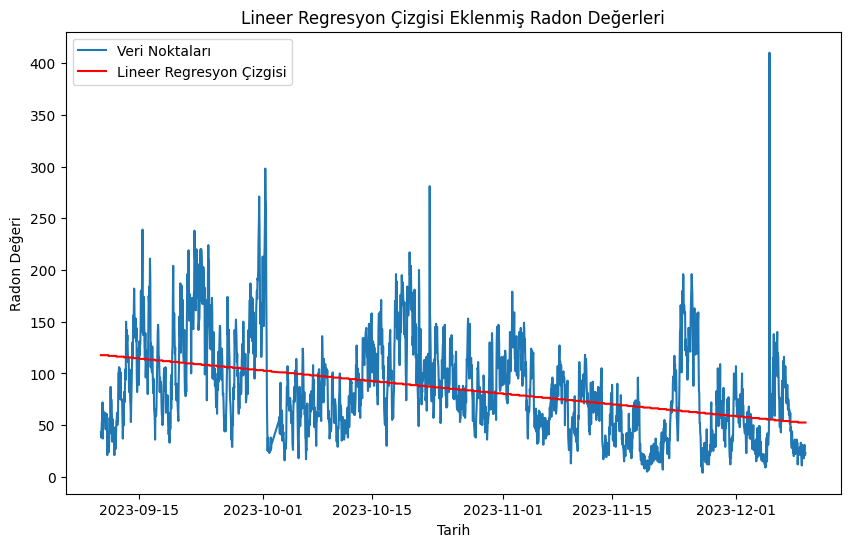

In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Başlangıç tarihi
start_date = datetime.strptime("2023-9-10", "%Y-%m-%d")

# Bitiş tarihi
end_date = datetime.strptime("2023-12-10", "%Y-%m-%d")

# Veri setini oku
file_path = os.path.join(csv_folder_path, chosen_sheet_d4)
df = pd.read_csv(file_path)
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].replace({',': '.'}, regex=True).astype(float)

# 'tarih' sütunu var mı kontrol et
if 'tarih' not in df.columns:
    print(f"{chosen_sheet_d4} adlı sayfa için 'tarih' sütunu bulunamadı.")
else:
    # Tarih sütununu datetime formatına çevir
    df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S')

    # Tarih verilerini gün sayısına dönüştür
    df['days_from_start'] = (df['tarih'] - start_date).dt.days

    # Filtreleme
    df = df[(df['tarih'] >= start_date) & (df['tarih'] <= end_date)]

    # Veri setini görselleştir
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='tarih', y='radon_real', data=df, label='Veri Noktaları')

    # Lineer regresyon modelini oluştur
    X = df['days_from_start'].values.reshape(-1, 1)
    y = df['radon_real'].values
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Lineer regresyon çizgisini oluştur
    reg_line = regressor.predict(X)
    plt.plot(df['tarih'], reg_line, color='red', label='Lineer Regresyon Çizgisi')

    # Eksen etiketleri ve başlık
    plt.xlabel('Tarih')
    plt.ylabel('Radon Değeri')
    plt.title('Lineer Regresyon Çizgisi Eklenmiş Radon Değerleri')

    # Legendları göster
    plt.legend()

    # Grafiği göster
    plt.show()


In [51]:
df.head()

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,days_from_start
373,2023-09-10 00:34:23,7.001,168.001,0.371,77.001,0.001,511.001,0.001,226.001,8.691,...,43.001,25.621,0.071,53.261,0.641,1013.871,0.061,-5.199,0.471,0
374,2023-09-10 01:35:34,8.001,168.001,0.001,77.001,0.001,511.001,0.001,222.001,8.911,...,38.001,25.491,0.021,53.941,0.261,1013.811,0.051,-4.629,0.421,0
375,2023-09-10 02:36:46,9.001,168.001,0.001,77.001,0.001,511.001,0.001,225.001,8.201,...,46.001,25.341,0.061,55.241,0.701,1013.571,0.041,-2.639,0.351,0
376,2023-09-10 03:37:57,10.001,170.001,0.501,78.001,0.001,511.001,0.001,224.001,7.781,...,53.001,25.101,0.071,58.641,0.851,1013.621,0.061,-3.059,0.481,0
377,2023-09-10 04:39:09,11.001,170.001,0.371,78.001,0.001,511.001,0.131,224.001,7.831,...,51.001,24.841,0.081,60.531,0.431,1013.621,0.031,-3.119,0.251,0


In [53]:
# Tüm sütunların ortalamalarını hesapla
mean_values = df.mean()

# Ortalamaları ekrana yazdır
print(mean_values)



amain                11.397208
meanAM0             158.533329
stDevG1               0.411253
meanAM1              88.937801
stDevG2               0.535404
meanAM6             511.001000
stDeva6               0.277553
meanAM7             167.194972
stDeva7               8.767568
mtotal               84.202264
radon_real           84.946066
meanTemp             21.296737
stDevT                0.169809
meanHum              64.567257
stDevH                0.671194
meanPres           1014.635249
stDevP                0.121831
Su_motor            -11.430604
stDev_motor           1.007699
days_from_start      45.186193
dtype: float64


<ipython-input-53-63bd9ca4b5ed>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()


In [46]:
# Veri setini görselleştirme yerine değerleri görüntüle
df[['days_from_start', 'radon_real']]


,days_from_start,radon_real
373,0,43.001
374,0,38.001
375,0,46.001
376,0,53.001
377,0,51.001
...,...,...
2425,90,25.001
2426,90,31.001
2427,90,21.001
2428,90,21.001


###NOISE SİLME KISMI

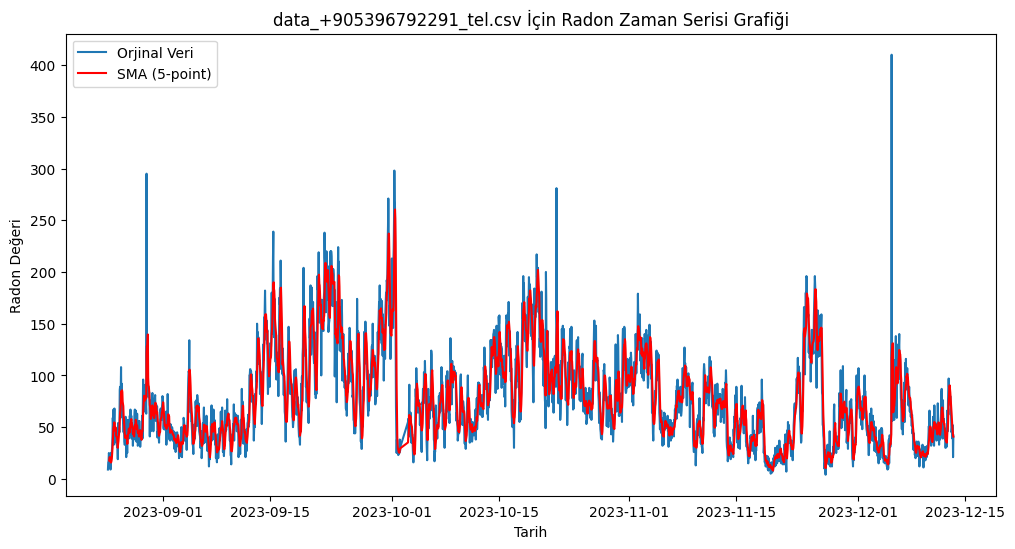

In [ ]:
file_path_specific = os.path.join(csv_folder_path, chosen_sheet_d4)
df_specific = pd.read_csv(file_path_specific)

# Türkçe formatındaki sayıları uygun formata dönüştür
numeric_columns_specific = df_specific.columns[1:]
df_specific[numeric_columns_specific] = df_specific[numeric_columns_specific].replace({',': '.'}, regex=True).astype(float)

# Kontrol et: 'tarih' sütunu var mı?
if 'tarih' not in df_specific.columns:
    print(f"{chosen_sheet_d4} adlı sayfa için 'tarih' sütunu bulunamadı.")
else:
    # Tarih sütununu datetime formatına çevir
    df_specific['tarih'] = pd.to_datetime(df_specific['tarih'], format='%d.%m.%y-%H:%M:%S')

    # Seçilen sütunları belirle
    time_series_columns_specific = ['tarih', 'radon_real']

    # Veriyi seçilen sütunlara göre filtrele
    time_series_data_specific = df_specific[time_series_columns_specific]

    # Tarih sütununu indeks olarak ayarla
    time_series_data_specific.set_index('tarih', inplace=True)


window_size = 5  # Aritmetik ortalama için pencere boyutu
df_specific['radon_real_smoothed'] = df_specific['radon_real'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_specific['tarih'], df_specific['radon_real'], label='Orjinal Veri')
plt.plot(df_specific['tarih'], df_specific['radon_real_smoothed'], label=f'SMA ({window_size}-point)', color='red')
plt.title(f"{chosen_sheet_d4} İçin Radon Zaman Serisi Grafiği")
plt.xlabel('Tarih')
plt.ylabel('Radon Değeri')
plt.legend()
plt.show()